# **Import the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import the Dataset**

In [ ]:
data = pd.read_csv('ai4i2020.csv')
data = data.iloc[:,:-5]
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0


In [ ]:
data = data.drop(['Product ID','UDI'], axis = 1)
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


In [ ]:
data['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [ ]:
data['Type'] = data['Type'].map({'L': 1, 'M': 2, 'H': 3})
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0
9996,3,298.9,308.4,1632,31.8,17,0
9997,2,299.0,308.6,1645,33.4,22,0
9998,3,299.0,308.7,1408,48.5,25,0


# **Handle Duplicated data**

In [ ]:
data.duplicated().sum()

0

# **Feature Selection**

<Axes: >

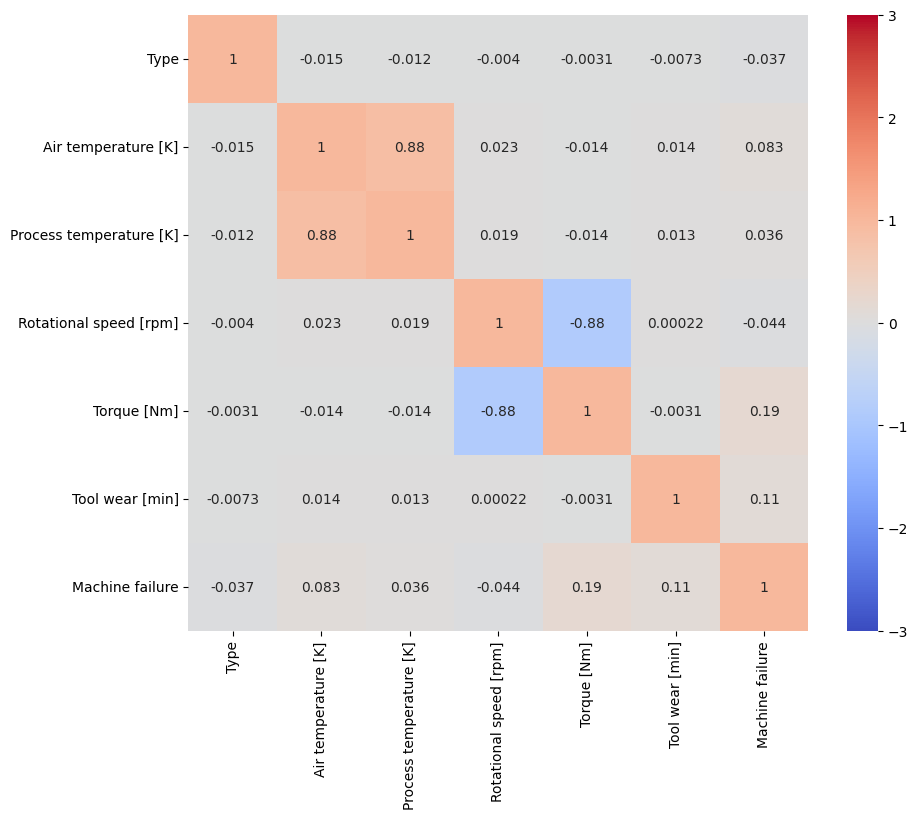

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), vmin = -3, vmax = 3, annot = True, cmap = 'coolwarm')

**Spliting the Dataset into the Training set, Validation set, and Test set**

In [ ]:
X1 = data.iloc[:,:-1]
Y1 = data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape

(7000, 6)

In [ ]:
X_test.shape

(3000, 6)

In [ ]:
#Create train data
df_train = pd.concat([X_train, Y_train], axis = 1)

#Create test data
df_test = pd.concat([X_test, Y_test], axis = 1)

#Create Validation data
valid_train = df_train.sample(n = 668)
valid_test = df_test.sample(n = 286)

#final_result
df_valid = pd.concat([valid_train, valid_test], axis = 0).reset_index().drop('index', axis = 1)

# **Handle Imbalanced Data**

In [ ]:
df_train.iloc[:,-1].value_counts()

0    6760
1     240
Name: Machine failure, dtype: int64

**Over-Sampling**

**SMOTE (Synthetic Minority Oversampling Technique)**

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#Build SMOTE
smote = SMOTE()

#separate values
x = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

#fit predictor and target values on smote
x_smote, y_smote = smote.fit_resample(x,y)

In [ ]:
x_smote_df = pd.DataFrame(x_smote, columns = x.columns)
y_smote_df = pd.DataFrame(y_smote)
df_train1 = pd.concat([x_smote_df, y_smote_df], axis = 1)

In [ ]:
df_train1.iloc[:,-1].value_counts()

0    6760
1    6760
Name: Machine failure, dtype: int64

In [ ]:
df_train1.duplicated().sum()

0

In [ ]:
df_train1.shape

(13520, 7)

**Training the Decision Tree model on the Training set**

In [ ]:
x_train = df_train1.iloc[:,:-1]
y_train = df_train1.iloc[:,-1]
x_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]
x_valid = df_valid.iloc[:,:-1]
y_valid = df_valid.iloc[:,-1]

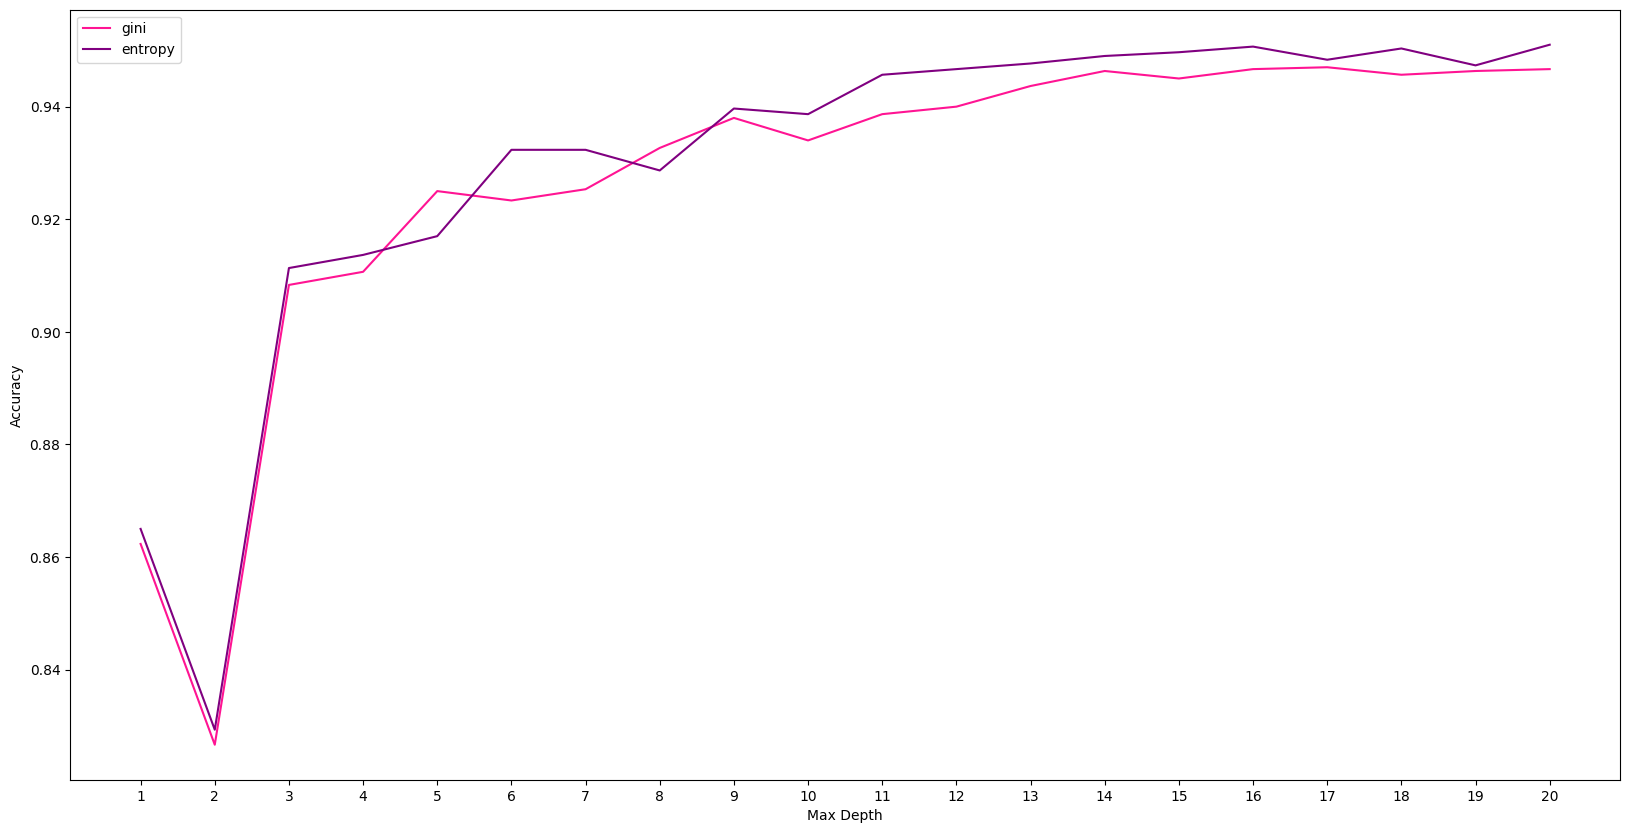

In [ ]:
#Important Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1, 21):
  dtree = DecisionTreeClassifier(criterion = 'gini', max_depth = i)
  dtree.fit(x_train, y_train)
  dtree_pred = dtree.predict(x_test)
  acc_gini.append(accuracy_score(y_test, dtree_pred))

  dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
  dtree.fit(x_train, y_train)
  dtree_pred = dtree.predict(x_test)
  acc_entropy.append(accuracy_score(y_test, dtree_pred))

  max_depth.append(i)


df = pd.DataFrame({'acc_gini' : pd.Series(acc_gini),
                   'acc_entropy' : pd.Series(acc_entropy),
                   'max_depth' : pd.Series(max_depth)})

dig = plt.figure(figsize = (20, 10))
plt.plot('max_depth', 'acc_gini', data = df, label = 'gini', color = 'deeppink')
plt.plot('max_depth', 'acc_entropy', data = df, label = 'entropy', color = 'purple')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks([j for j in range(1,21)])
plt.legend()
plt.show()

In [ ]:
DT_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 11)
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [ ]:
#grid search hyperparameter for the Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
#define model
model = RandomForestClassifier()

#define model evaluation method
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

#define grid
grid = dict()
grid['n_estimators'] = range(50, 200)
grid['criterion'] = ['gini', 'entropy']
grid['max_depth'] = range(1,21)

#define search
search = GridSearchCV(model, grid, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = 1)

#perform the search
results = search.fit(x_train, y_train)

#finalization
print("MAE: %.3f" % results.best_score_)
print("Config: %s" % results.best_params_)

**n_splits (Number of Folds):**

Common choices are 5, 10, or a similar number.
Smaller values (e.g., 5) are faster but may provide a less stable estimate of model performance.
Larger values (e.g., 10) are computationally more expensive but can provide a more reliable estimate.

**n_repeats (Number of Repeats):**

It depends on the variability of your data and the desire for a more robust estimate.
If your dataset is large and relatively homogeneous, you might need fewer repeats.
If your dataset is small or has high variability, more repeats can help get a more stable estimate of performance.

**random_state (Random Seed):**

This is used to ensure reproducibility. You might choose any integer value.
If you want to compare models or results across different runs, using the same random seed is crucial.
If you don't care about reproducibility, you can omit this parameter, and the splits will be different each time you run the code.

In [ ]:
RF_model = RandomForestClassifier(n_estimators = ,criterion = '', max_depth = )
RF_model.fit(x_train, y_train)

# **Predict Test set Results**

In [ ]:
y_t_pred = RF_model.predict(x_test)

In [ ]:
y_v_pred = RF_model.predict(x_valid)

# **Evaluation of Algorithm**

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_t_pred)

**Accuracy Score**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_t_pred)

In [ ]:
accuracy_score(y_valid, y_v_pred)

### **Precision and Recall**

**Precision**

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,y_t_pred)

**Recall**

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,y_t_pred)

### **F1-Score**

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_t_pred)

# **XGBOOST**

XGBoost (eXtreme Gradient Boosting) is a powerful and efficient machine learning algorithm that belongs to the class of gradient boosting algorithms. It has gained widespread popularity in various machine learning competitions and is widely used in practice due to its excellent performance and versatility. XGBoost is designed for speed and performance, making it particularly suitable for large datasets and complex problems

In [ ]:
#grid search hyperparameter for the Random Forest
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
#define model
model = XGBClassifier()

#define model evaluation method
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

#define grid
grid = dict()
grid['learning_rate'] = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
grid['max_depth'] = range(1,21)
grid['min_child_weight'] = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

#define search
search = GridSearchCV(model, grid, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = 1)

#perform the search
results = search.fit(x_train, y_train)

#finalization
print("MAE: %.3f" % results.best_score_)
print("Config: %s" % results.best_params_)

In [ ]:
XGB_model = XGBClassifier(learning_rate = , max_depth = , min_child_weight = )

In [ ]:
XGB_model.fit(x_train, y_train)

In [ ]:
pred_XGB_t = XGB_model.predict(x_test)

In [ ]:
pred_XGB_v = XGB_model.predict(x_valid)

# **Evaluation of Algorithm**

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_t_pred)

**Accuracy Score**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_t_pred)

In [ ]:
accuracy_score(y_valid, y_v_pred)

### **Precision and Recall**

**Precision**

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,y_t_pred)

**Recall**

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,y_t_pred)

### **F1-Score**

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_t_pred)